In [87]:
from avipy import qty, atmosphere as atm
import math

# Individual assignment on Takeoff Weight Limitations

Make a TL (take-off weight limitation) table for a B777-300ER  commercial aircraft for Hong Kong's Chek Lap Kok International Airport runway 25C with the environmental condition of 17 degrees Celsius and no wind. The B777-300ER has two certified take-off flap settings of 5 and 15, 15 degrees will be used for the calculations. The aircraft is equipped with GE90-115B engines that deliver a thrust of 104,500 lbs per engine at sea level. The engine is flat rated up to ISA+15ºC. Above ISA+15° the thrust decreases by 0.4% per degree. Explain and make a conclusion of your results!

## Runway
- ASDA and TODA are 2900 m
- Elevation 0 ft
- No runway slope
- Obstacle 1600 m after end of the runway at 103 ft
- Coefficient of friction, $ \mu = 0.027 $

## Aircraft
- MTOW, $ m = 351534 kg $
- wingspan, $ b = 64.8 m $
- wing area, $ S = 436.8 m^2 $
- oswald factor, $ e = 0.77 $
- drag coefficient at flap 15, $ C_{D_0} = 0.068 $
- Stall speed at MTOW with flaps 15, $ v_{stall} = 154.5 kts $
- $ v_2 = 1.18 \cdot v_{stall} $
- $ v_{lof} = 1.15 v_{stall} $
- Coefficient of friction with full brakes, $ \mu = 0.56 $

## Assumptions
- During climb to 1500 ft, air pressure remains constant to ISA at sea level.
- Engine thrust is constant during takeoff.
- N-1 situation arises at lift-off.
- For ASDR, no need to consider pilot's reaction time => $ v_1 == v_{lof} $.
- At $ v_{lof} $, the ground run instantly changes into the take-off arc.

In [88]:
toda = qty.Distance(2900)
asda = qty.Distance(2900)
height_b = qty.Distance.Ft(35)
mu = 0.027
mu_brake = 0.56
temp = qty.Temperature.Celsius(17)
pressure = qty.Pressure.Hpa(1013.25)
obstacle_distance = qty.Distance(1600)
obstacle_height = qty.Distance.Ft(103)

mtom = qty.Mass(351534)
mtow = qty.Force.Kg(mtom)
wingspan = qty.Distance(64.8)
surface = qty.Area(436.8)
oswald = 0.77
cd_0 = 0.068
v_stall_mtow = qty.Velocity.Kts(154)

v_stall_to_lof = 1.15
v_stall_to_v2 = 1.18

stall_speeds: list[tuple[qty.Mass, qty.Velocity]] = [
    (mtom, v_stall_mtow),
    (qty.Mass.M_ton(350), qty.Velocity.Kts(153.5)),
    (qty.Mass.M_ton(349), qty.Velocity.Kts(153)),
    (qty.Mass.M_ton(348), qty.Velocity.Kts(152.5)),
    (qty.Mass.M_ton(347), qty.Velocity.Kts(152.5)),
    (qty.Mass.M_ton(346), qty.Velocity.Kts(152)),
    (qty.Mass.M_ton(345), qty.Velocity.Kts(151.5)),
    (qty.Mass.M_ton(344), qty.Velocity.Kts(151)),
    (qty.Mass.M_ton(343), qty.Velocity.Kts(150)),
    (qty.Mass.M_ton(342), qty.Velocity.Kts(150)),
    (qty.Mass.M_ton(341), qty.Velocity.Kts(149.5)),
    (qty.Mass.M_ton(340), qty.Velocity.Kts(149)),
    (qty.Mass.M_ton(339), qty.Velocity.Kts(148.5)),
    (qty.Mass.M_ton(338), qty.Velocity.Kts(148)),
    (qty.Mass.M_ton(337), qty.Velocity.Kts(148)),
    (qty.Mass.M_ton(336), qty.Velocity.Kts(147.5)),
    (qty.Mass.M_ton(335), qty.Velocity.Kts(147)),
    (qty.Mass.M_ton(334), qty.Velocity.Kts(146.5)),
    (qty.Mass.M_ton(333), qty.Velocity.Kts(146)),
    (qty.Mass.M_ton(332), qty.Velocity.Kts(146)),
    (qty.Mass.M_ton(331), qty.Velocity.Kts(145.5)),
    (qty.Mass.M_ton(330), qty.Velocity.Kts(145)),
    (qty.Mass.M_ton(329), qty.Velocity.Kts(144.5)),
    (qty.Mass.M_ton(328), qty.Velocity.Kts(144)),
    (qty.Mass.M_ton(327), qty.Velocity.Kts(143.5)),
    (qty.Mass.M_ton(326), qty.Velocity.Kts(143)),
    (qty.Mass.M_ton(325), qty.Velocity.Kts(142.5)),
    (qty.Mass.M_ton(324), qty.Velocity.Kts(142)),
    (qty.Mass.M_ton(323), qty.Velocity.Kts(141.5)),
    (qty.Mass.M_ton(322), qty.Velocity.Kts(141)),
    (qty.Mass.M_ton(321), qty.Velocity.Kts(140.5)),
    (qty.Mass.M_ton(320), qty.Velocity.Kts(140)),
    (qty.Mass.M_ton(319), qty.Velocity.Kts(139.5)),
    (qty.Mass.M_ton(318), qty.Velocity.Kts(139)),
    (qty.Mass.M_ton(317), qty.Velocity.Kts(138.5)),
    (qty.Mass.M_ton(316), qty.Velocity.Kts(138)),
    (qty.Mass.M_ton(315), qty.Velocity.Kts(137.5)),
    (qty.Mass.M_ton(314), qty.Velocity.Kts(137)),
    (qty.Mass.M_ton(313), qty.Velocity.Kts(136.5)),
    (qty.Mass.M_ton(312), qty.Velocity.Kts(136)),
    (qty.Mass.M_ton(311), qty.Velocity.Kts(135.5)),
    (qty.Mass.M_ton(310), qty.Velocity.Kts(135)),
    (qty.Mass.M_ton(309), qty.Velocity.Kts(134.5)),
    (qty.Mass.M_ton(308), qty.Velocity.Kts(134)),
    (qty.Mass.M_ton(307), qty.Velocity.Kts(133.5)),
    (qty.Mass.M_ton(306), qty.Velocity.Kts(133)),
    (qty.Mass.M_ton(305), qty.Velocity.Kts(132.5)),
    (qty.Mass.M_ton(304), qty.Velocity.Kts(132)),
    (qty.Mass.M_ton(303), qty.Velocity.Kts(131.5)),
    (qty.Mass.M_ton(302), qty.Velocity.Kts(131)),
    (qty.Mass.M_ton(301), qty.Velocity.Kts(130.5)),
    (qty.Mass.M_ton(300), qty.Velocity.Kts(130)),
    (qty.Mass.M_ton(299), qty.Velocity.Kts(129.5)),
    (qty.Mass.M_ton(298), qty.Velocity.Kts(129)),
    (qty.Mass.M_ton(297), qty.Velocity.Kts(128.5)),
    (qty.Mass.M_ton(296), qty.Velocity.Kts(127.5)),
    (qty.Mass.M_ton(295), qty.Velocity.Kts(127)),
    (qty.Mass.M_ton(294), qty.Velocity.Kts(126.5)),
    (qty.Mass.M_ton(293), qty.Velocity.Kts(126)),
    (qty.Mass.M_ton(292), qty.Velocity.Kts(125.5)),
    (qty.Mass.M_ton(291), qty.Velocity.Kts(125)),
    (qty.Mass.M_ton(290), qty.Velocity.Kts(124.5)),
    (qty.Mass.M_ton(289), qty.Velocity.Kts(124)),
    (qty.Mass.M_ton(288), qty.Velocity.Kts(123.5)),
    (qty.Mass.M_ton(287), qty.Velocity.Kts(122.5)),
    (qty.Mass.M_ton(286), qty.Velocity.Kts(122)),
    (qty.Mass.M_ton(285), qty.Velocity.Kts(121.5)),
    (qty.Mass.M_ton(284), qty.Velocity.Kts(121)),
    (qty.Mass.M_ton(283), qty.Velocity.Kts(120.5)),
    (qty.Mass.M_ton(282), qty.Velocity.Kts(120)),
    (qty.Mass.M_ton(281), qty.Velocity.Kts(119)),
    (qty.Mass.M_ton(280), qty.Velocity.Kts(118.5)),
    (qty.Mass.M_ton(279), qty.Velocity.Kts(118)),
    (qty.Mass.M_ton(278), qty.Velocity.Kts(117.5)),
    (qty.Mass.M_ton(277), qty.Velocity.Kts(116.5)),
    (qty.Mass.M_ton(276), qty.Velocity.Kts(116)),
    (qty.Mass.M_ton(275), qty.Velocity.Kts(115.5)),
    (qty.Mass.M_ton(274), qty.Velocity.Kts(115)),
    (qty.Mass.M_ton(273), qty.Velocity.Kts(114)),
    (qty.Mass.M_ton(272), qty.Velocity.Kts(113.5)),
    (qty.Mass.M_ton(271), qty.Velocity.Kts(113)),
    (qty.Mass.M_ton(270), qty.Velocity.Kts(112.5)),
    (qty.Mass.M_ton(269), qty.Velocity.Kts(111.5)),
    (qty.Mass.M_ton(268), qty.Velocity.Kts(110.5)),
    (qty.Mass.M_ton(267), qty.Velocity.Kts(110)),
    (qty.Mass.M_ton(266), qty.Velocity.Kts(109.5)),
    (qty.Mass.M_ton(265), qty.Velocity.Kts(109)),
    (qty.Mass.M_ton(264), qty.Velocity.Kts(108)),
    (qty.Mass.M_ton(263), qty.Velocity.Kts(107)),
    (qty.Mass.M_ton(262), qty.Velocity.Kts(106)),
    (qty.Mass.M_ton(261), qty.Velocity.Kts(104)),
    (qty.Mass.M_ton(260), qty.Velocity.Kts(103)),
]


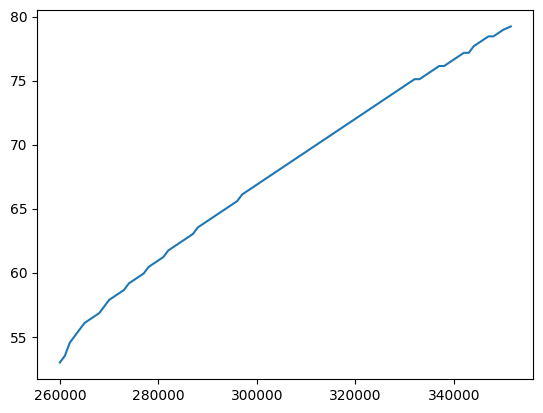

In [89]:
import matplotlib.pyplot as plt

plt.plot([pair[0].base for pair in stall_speeds], [pair[1].base for pair in stall_speeds])


## Constants
Before any distance is calculated, some constant values for this scenario will be calculated.

#### 1. Density with the given temperature and constant ISA pressure
$ \large \rho = \frac{P}{R \cdot T} $

#### 2. Thrust for one engine and with both
The engines are flat-rated up to $ ISA+15 \degree C $, since the temperature in this scenario is $ 17 \degree C $, the thrust does not decrease. The thrust values in LBS are converted to Newton using the qty module.

#### 3. Aspect ratio and $ C_{L_{max}} $

$ \large AR = \frac{b^2}{S} $

The $ C_{L_{max}} $ can be obtained using the lift equation with the MTOW and stall speed at MTOW:

$ \large C_{L_{max}} = \frac{2 \cdot W}{\rho \cdot v_{stall}^2 \cdot S} $


In [90]:
# 1. Density
density = pressure / (287 * temp)

# 2. Thrust
thrust_per_engine = qty.Force.Kg(qty.Mass.Lbs(104500))
thrust = qty.Force(thrust_per_engine * 2)

# 3. Aspect ratio and CL_max
aspect_ratio = wingspan**2 / surface
cl_max = (2 * mtow) / (density * surface * v_stall_mtow**2)

cl_max

2.0675363973645564

## Takeoff Ground Run
To calculate the take-off run distance, assuming the acceleration is not constant, three steps are taken:

#### 1. Calculate the optimal values of $ C_L $ and $ C_D $ for the minimum run distance

$ C_L = \frac{1}{2} \cdot \mu \cdot \pi \cdot AR \cdot e $

$ C_D = C_{D_0} + \frac{C_L^2}{\pi \cdot AR \cdot e} $

#### 2. Calculate the aerodynamic factor and d factor needed in the ground run equation

$ e = \frac{\rho \cdot S}{2 \cdot W} \cdot (C_D - \mu \cdot C_L) $

$ d = \frac{T}{W} - \mu $

#### 3. Calculate the ground run distance provided the acceleration is not constant

$ \large S_A = \frac{1}{2 \cdot g \cdot e} \cdot \ln{\frac{d}{d - e \cdot v_{LOF}^2}} $

In [91]:
def get_gnd_run(weight: qty.Force, v_stall: qty.Velocity) -> qty.Distance:
    # 1. Get the optimal C_L and C_D values
    cl_run = 0.5 * mu * math.pi * aspect_ratio * oswald
    cd_run = cd_0 + cl_run**2 / (math.pi * aspect_ratio * oswald)
    
    # 2. Calculate aero-factor and d-factor
    aero_factor = (density * surface) / (2 * weight) * (cd_run - mu * cl_run)
    d_factor = thrust / weight - mu

    # 3. Get the ground run distance
    v_lof = v_stall_to_lof * v_stall
    
    ground_run = 1 / (2 * 9.81 * aero_factor) * math.log(d_factor / (d_factor - aero_factor * v_lof**2))

    # Return the ground run as a distance for the given weight and stall speed
    return qty.Distance(ground_run)

## Takeoff Air Run

At lift-off speed, an N - 1 situation arises. Which means the available thrust will be that of one engine. This value will be used in the following calculations.

The takeoff arc distance is calculated in multiple steps:

#### 1. Calculate the $ C_L $ and $ C_D $ at point C
At point C, the end of the arc, the aircraft assumes a climb with the optimal configuration for climb gradient. In this configuration $\frac{C_L}{C_D} $ is maximum. 

The $ C_D $ in this configuration is obtained by:

$ C_{D_C} = 2 \cdot C_{D_0} $

and $ C_L $ is obtained by:

$ C_{L_C} = (C_{D_C} - C_{D_0}) \cdot \pi \cdot AR \cdot e $

#### 2. Calculate the drag at point C

The drag is obtained by

$ D_C = W \cdot \frac{C_{D_C}}{C_{L_C}} $

#### 3. Calculate the climb gradient at point C

While in the given configuration, the climb gradient is obtained by:

$ \sin{\gamma_C} = \frac{T - D}{W} $

#### 4. Calculate the lift and drag coefficients at liftoff

By equalling the lift at stall speed and the lift at take-off speed, it is found that:

$ \large C_{L_{LOF}} = \frac{C_{L_{max}}}{ratio^2} $

where $ ratio $ is equal to the ratio between the liftoff speed and the stall speed, 1.15 in this scenario. Then the drag coefficient is obtained using

$ \large C_{D_{LOF}} = C_{D_0} + \frac{C{L_{LOF}}^2}{\pi \cdot AR \cdot e} $

#### 5. Calculate the average drag during the takeoff arc
The drag at liftoff is obtained using the drag equation

$ D_{LOF} = \frac{1}{2} \cdot \rho \cdot v_{LOF}^2 \cdot S \cdot C_{D_{LOF}} $

Then the average drag is obtained by

$ D_{avg} = \frac{D_{LOF} + D_C}{2} $

#### 6. Calculate the air run distance

All known values can now be substituted into the energy equation to solve for the air run distance:

$ \large \frac{W}{2 \cdot g} \cdot (v_C^2 - v_{LOF}^2) = (T - D_{avg}) \cdot S_B - W \cdot h_B $

This becomes

$ \LARGE S_B = \frac{\frac{W}{2 \cdot g} \cdot (v_C^2 - v_{LOF}^2) + W \cdot h_B}{T - D_{avg}} $


In [92]:
def get_air_run(weight: qty.Force, v_stall: qty.Velocity) -> tuple[qty.Distance, float]:
    # 1. Get C_L and C_D at point C
    cd_c = cd_0 * 2
    cl_c = (cd_c - cd_0) * math.pi * aspect_ratio * oswald
    
    # 2. Calculate the drag at point C
    drag_c = weight * (cd_c / cl_c)
    
    # 3. Calculate the climb gradient at point C
    gradient_c = math.asin((thrust_per_engine - drag_c) / weight)
    
    # 4. Calculate the lift coefficent at liftoff
    cl_lof = cl_max / v_stall_to_lof**2
    cd_lof = cd_0 + cl_lof**2 / (math.pi * aspect_ratio * oswald)

    # 5. Calculate the average drag in the takeoff arc
    v_lof = v_stall * v_stall_to_lof
    drag_lof = 0.5 * density * v_lof**2 * surface * cd_lof
    drag_avg = (drag_lof + drag_c) / 2

    # 6. Calculate the air run distance
    v_c = v_stall * v_stall_to_v2
    air_run = (weight / (2 * 9.81) * (v_c**2 - v_lof**2) + weight * height_b) / (thrust_per_engine - drag_avg)

    # Return the air run distance for the given weight and stall speed
    return qty.Distance(air_run), gradient_c

## Obstacle Clearance

Obstacle 1600 m at 103 ft. After takeoff arc, aircraft climbs with optimal climb gradient $ \gamma_C $. This gives:

$ \tan{\gamma_C} = \frac{hor}{ver} \rightarrow ver = hor \cdot \tan{\gamma_C}$

In [93]:
def get_obstacle_clearance(residual_rwy_dist: qty.Distance, gradient_c: float) -> qty.Distance:
    height_at_obstacle = (obstacle_distance + residual_rwy_dist) * math.tan(gradient_c)
    return qty.Distance(height_at_obstacle - obstacle_height)

## Stop distance at $ V_1 $


In [94]:
def get_stop_dist(weight, v_stall):
    cl_run = cl_max / v_stall_to_lof**2
    cd_run = cd_0 + cl_run**2 / (math.pi * aspect_ratio * oswald)

    aero_factor = (density * surface) / (2 * weight)  * (cd_run - mu_brake * cl_run)
    d_factor = - mu_brake
    
    v_lof = v_stall * v_stall_to_lof
    stop_dist = 1 / (2 * 9.81 * aero_factor) * math.log((d_factor - aero_factor * v_lof**2) / d_factor)

    return qty.Distance(stop_dist)

In [95]:
tod_weight = None
asd_weight = None
obs_weight = None

for i in range(len(stall_speeds)):
    if tod_weight != None and asd_weight != None and obs_weight != None:
        break
    
    mass, v_stall = stall_speeds[i]
    
    weight = qty.Force.Kg(mass)
    ground_run = get_gnd_run(weight, v_stall)
    air_run, gradient_c = get_air_run(weight, v_stall)
    
    takeoff_dist = qty.Distance(ground_run + air_run)
    
    residual_rwy_dist = qty.Distance(toda - takeoff_dist)
    
    obstacle_clearance = get_obstacle_clearance(residual_rwy_dist, gradient_c)
    
    stop_dist = get_stop_dist(weight, v_stall)
    accel_stop_dist = qty.Distance(ground_run + stop_dist)
    

    if takeoff_dist < toda and tod_weight == None:
        tod_weight = mass
        
    if accel_stop_dist < asda and asd_weight == None:
        asd_weight = mass
    
    if obstacle_clearance.ft > 35 and obs_weight == None:
        obs_weight = mass

print(tod_weight, asd_weight, obs_weight) 

351534.00 kilograms 333000.00 kilograms 351534.00 kilograms
